# Ejemplo de regresión lineal
- Basado en: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score

In [24]:
def funcion_real(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_datos = 30
grados = [1, 4, 15]

In [25]:
X = np.sort(np.random.rand(n_datos)) # Núm. aleatorios entre 0 y 1
y = funcion_real(X) + np.random.randn(n_datos) * 0.1

Grado:  1  Coeficientes:  [-1.48541842]
::: R2::: 0.557927632161235 

Grado:  4  Coeficientes:  [  2.70257599 -27.43426613  38.44651761 -14.58668188]
::: R2::: 0.9967312234460963 

Grado:  15  Coeficientes:  [-1.46899166e+02  3.70908034e+03 -4.16947524e+04  2.03130927e+05
  1.17351994e+05 -7.23913576e+06  4.55954118e+07 -1.61264310e+08
  3.76469802e+08 -6.09288220e+08  6.90802184e+08 -5.40203469e+08
  2.78146368e+08 -8.49836561e+07  1.16826729e+07]
::: R2::: 0.8104028723822732 



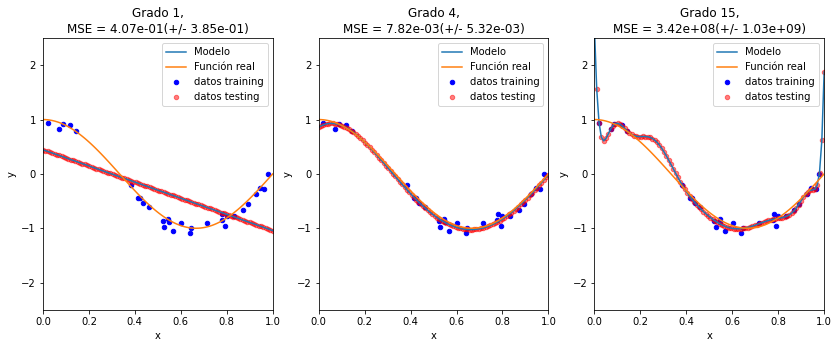

In [54]:
plt.figure(figsize=(14, 5))

for i in range(len(grados)):
    ax = plt.subplot(1, len(grados), i + 1)
    var_poli = PolynomialFeatures(degree=grados[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", var_poli),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    print("Grado: ", grados[i], " Coeficientes: ", pipeline.steps[1][1].coef_)
    
    # Evaluar modelo usando cross-validation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    
    from sklearn.metrics import r2_score
    predictions = pipeline.predict(X_test[:, np.newaxis])
    print("::: R2:::",r2_score(funcion_real(X_test), predictions), "\n")

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Modelo")
    plt.plot(X_test, funcion_real(X_test), label="Función real")
    plt.scatter(X, y, edgecolor='b', s=20, label="datos training", color="b")
    plt.scatter(X_test, pipeline.predict(X_test[:, np.newaxis]), color="r", 
                edgecolor='r', s=20, label="datos testing", alpha=0.5)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2.5, 2.5))
    plt.legend(loc="best")
    plt.title("Grado {},\nMSE = {:.2e}(+/- {:.2e})".format(
        grados[i], -scores.mean(), scores.std()))
plt.show()